# Generate T-SNE plots with scanpy

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scanpy as sc
from matplotlib import pyplot as plt
import seaborn as sns
import anndata as ad
from dataset_handler import load_h5ad_files, preprocess_pipeline

In [4]:
# Load the data
datapath = '../dataset/'
ad_LD, ad_DD = load_h5ad_files(datapath)
adata = ad.concat([ad_LD, ad_DD], join="inner")
filtered_adata = preprocess_pipeline(adata)

# Select an appropiate subset of genes
with open('geneswegener.txt') as f:
    genes = f.read().splitlines()

In [6]:
# Compile t-sne representation
sc.tl.tsne(filtered_adata, n_pcs=30)

/home/gonzagrau/miniconda3/envs/rosvenv/lib/python3.11/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 15161 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


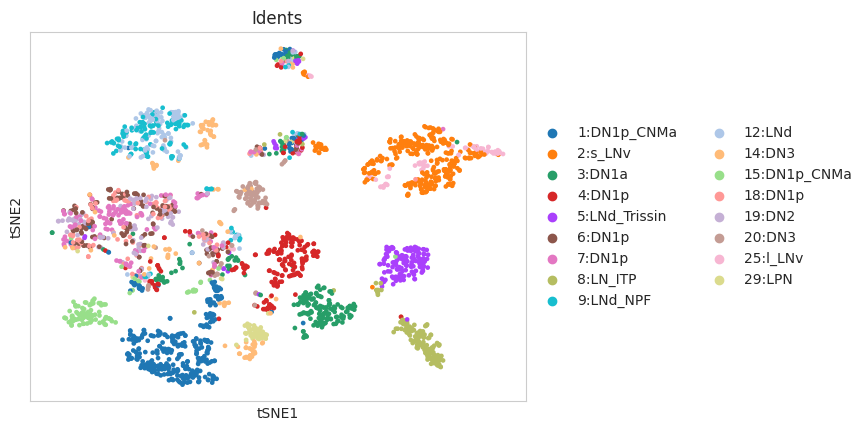

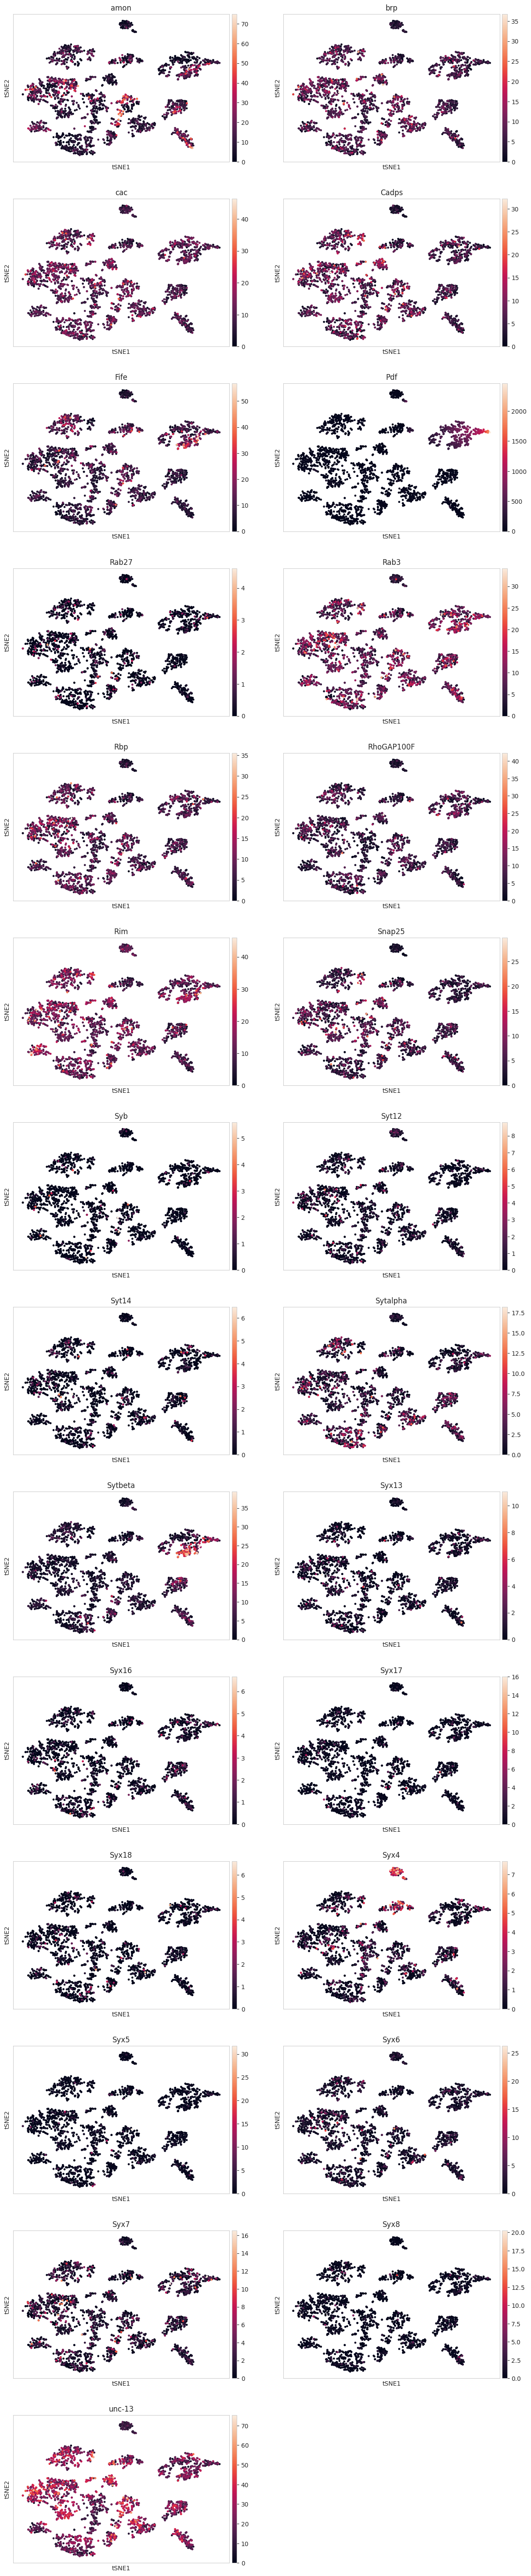

In [9]:
# Plot by cluster 
sc.pl.tsne(filtered_adata, color='Idents')

# Plot by gene
sc.pl.tsne(filtered_adata, color=genes, ncols=2)